# Importing required libraries

In [121]:
import pandas as pd
import numpy as np
import random
import math

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Getting and exploring data

In [119]:
data = pd.read_csv('Creditcard_data.csv')

In [3]:
data.shape

(772, 31)

In [89]:
print(data[data['Class']==0].shape)
print(data[data['Class']==1].shape)

(763, 31)
(9, 31)


<BarContainer object of 2 artists>

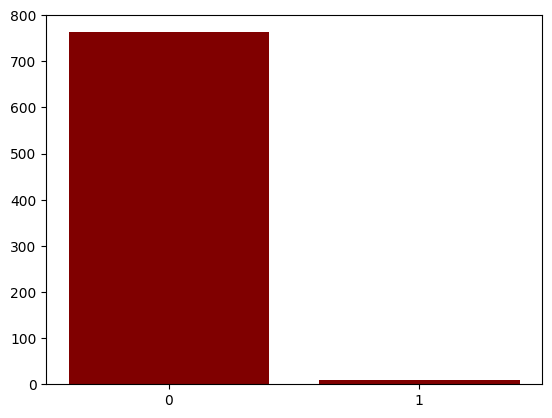

In [124]:
vals = data['Class'].unique()
size = []
for val in vals :
    size.append(len(data[data['Class']==val]))
plt.bar(['0','1'],size,color='maroon')

# Over Sampling 

In [101]:
x = data.drop('Class',axis = 1)
y = data['Class']

In [102]:
## using smote over sampling
ros = SMOTE()

x,y = ros.fit_resample(x,y)

In [7]:
y.value_counts()

0    763
1    763
Name: Class, dtype: int64

In [103]:
new_data = pd.concat([x,y],axis=1)

In [93]:
print(new_data)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
1521   488 -2.748374 -2.970008  1.478638  1.963587  1.671735 -0.595293   
1522   505 -1.884642  0.536320  0.474918  0.528475  0.553260 -0.580716   
1523   245  0.495642  0.366950  0.802864  0.515577  0.093851 -1.011388   
1524   462 -2.068984  1.146653 -0.423879  2.024235  0.089607 -0.945375   
1525   309 -1.359766  1.392682 -0.786735  2.447706  0.014835 -0.756622   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

# Normalizing data

In [106]:
cols = new_data.drop('Class',axis = 1).columns
scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data.drop('Class',axis = 1))

In [107]:
new_data = pd.DataFrame(new_data)
new_data.columns = cols
new_data = pd.concat([new_data,y],axis = 1)
new_data = new_data.drop(['Amount','Time'],axis=1)

In [108]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.616386,0.692769,0.869399,0.691108,0.439976,0.459464,0.530632,0.788571,0.380816,0.246943,...,0.271352,0.437531,0.701974,0.513576,0.627460,0.600847,0.243528,0.515872,0.629684,0
1,0.948663,0.712269,0.619092,0.584620,0.467823,0.396272,0.497922,0.787159,0.305572,0.224710,...,0.240185,0.415478,0.491363,0.545164,0.495497,0.616141,0.316255,0.486594,0.637983,1
2,0.616576,0.619854,0.788796,0.576791,0.428449,0.614688,0.587326,0.804043,0.152556,0.257022,...,0.297955,0.465837,0.815457,0.665712,0.382135,0.420238,0.255076,0.477069,0.620707,0
3,0.667632,0.686300,0.790885,0.434455,0.462906,0.550504,0.530427,0.817518,0.168065,0.234372,...,0.226672,0.427965,0.639340,0.501665,0.224375,0.806262,0.235952,0.501322,0.648824,0
4,0.642635,0.747455,0.765085,0.579454,0.435161,0.416954,0.566932,0.750227,0.435979,0.304066,...,0.286632,0.438474,0.821569,0.509551,0.651576,0.468394,0.403156,0.533509,0.684476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0.820615,0.727339,0.647433,0.554035,0.511614,0.417474,0.533998,0.788745,0.323855,0.225431,...,0.242233,0.423861,0.538522,0.552191,0.226420,0.072632,0.305109,0.530052,0.682676,1
1522,0.691434,0.721135,0.765748,0.553102,0.529738,0.320609,0.587679,0.766499,0.319675,0.194918,...,0.236444,0.443535,0.680781,0.500382,0.648838,0.603052,0.200048,0.476954,0.617314,1
1523,0.417678,0.578731,0.654983,0.837589,0.530302,0.273252,0.476007,0.803982,0.238164,0.130799,...,0.409900,0.506497,0.714870,0.676051,0.553410,0.640635,0.269729,0.459293,0.633903,1
1524,0.457944,0.581400,0.720199,0.674674,0.547701,0.314396,0.537387,0.779027,0.316488,0.190617,...,0.378288,0.477810,0.686595,0.647875,0.516973,0.573620,0.285495,0.429729,0.608055,1


# Model Training
### Applying different classifying models on different sampling techniques

In [109]:
def model_accuracy(model,x,y) :
    xTrain,xTest,yTrain,yTest = train_test_split(x,y,random_state=10)
    model.fit(xTrain,yTrain)
    yPred = model.predict(xTest)
    return accuracy_score(yPred,yTest)

In [110]:
m = ['XGBClassifier','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','SVC']
models = [XGBClassifier(),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(),SVC()]
acc_lst = pd.DataFrame()

In [111]:
## Random Sampling

sample1 = new_data.sample(n=750,ignore_index=True,random_state=10)
x = sample1.drop('Class',axis = 1)
y = sample1['Class']
lst = []
for model in models :
    lst.append(model_accuracy(model,x,y))
acc_lst['Random Sampling'] = lst

In [112]:
## Systematic sampling

sample2 = new_data.iloc[::2]
x = sample2.drop('Class',axis = 1)
y = sample2['Class']
lst = []
for model in models :
    lst.append(model_accuracy(model,x,y))
acc_lst['Systematic Sampling'] = lst

In [113]:
## Stratified sampling

class_0 = new_data[new_data['Class']==0]
class_1 = new_data[new_data['Class']==1]

class_0 = class_0.sample(n=375,ignore_index = True,random_state = 10)
class_1 = class_1.sample(n=375,ignore_index = True,random_state = 10)

sample3 = pd.concat([class_0,class_1],axis = 0)
x = sample3.drop('Class',axis = 1)
y = sample3['Class']
lst = []
for model in models :
    lst.append(model_accuracy(model,x,y))
acc_lst['Stratified Sampling'] = lst

In [114]:
## Cluster sampling

cluster_lst = []
sample4 = pd.DataFrame()
for i in range(10) :
    cluster = new_data.sample(n=150,ignore_index=True,random_state=i)
    cluster_lst.append(cluster)
for i in range(5) :
    sample4 = pd.concat([sample4,cluster_lst[math.floor(random.random()*10)]])

x = sample4.drop('Class',axis = 1)
y = sample4['Class']
lst = []
for model in models :
    lst.append(model_accuracy(model,x,y))
acc_lst['Cluster Sampling'] = lst

In [115]:
## multistage sampling
classes = new_data['Class'].unique()
class_0 = new_data[new_data['Class']==0].reset_index()
class_1 = new_data[new_data['Class']==1].reset_index()
random_lst = []
lst = []
for _ in range(750) :
    random_lst.append(classes[math.floor(random.random()*2)])
sample5 = pd.DataFrame()
for data in random_lst :
    if data == 0 :
        sample5 = pd.concat([sample5,class_0.sample(1)],axis=0)
    else :
        sample5 = pd.concat([sample5,class_1.sample(1)],axis=0)
sample5 = sample5.reset_index()
for model in models :
    lst.append(model_accuracy(model,x,y))
acc_lst['Multistage Sampling'] = lst

In [116]:
acc_lst_t = acc_lst.transpose()
acc_lst_t.columns = m
acc_lst_t.transpose()

,Random Sampling,Systematic Sampling,Stratified Sampling,Cluster Sampling,Multistage Sampling
XGBClassifier,0.984043,0.989529,0.984043,0.984043,0.984043
DecisionTreeClassifier,0.968085,0.931937,0.984043,0.962766,0.973404
LogisticRegression,0.819149,0.743455,0.824468,0.851064,0.851064
KNeighborsClassifier,0.898936,0.921466,0.957447,0.925532,0.925532
SVC,0.936170,0.952880,0.973404,0.952128,0.952128
